In [1]:
import numpy as np
import graphlab as gl
import handythreadd40c
import time
import matplotlib.pyplot as plt

This non-commercial license of GraphLab Create for academic use is assigned to ivanhahanov@icloud.com and will expire on July 15, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1514826567.log


In [2]:
gl.canvas.set_target('ipynb')

In [3]:
data = gl.SFrame('https://static.turi.com/datasets/mnist/sframe/train')
test_data = gl.SFrame('https://static.turi.com/datasets/mnist/sframe/test')
training_data, validation_data = data.random_split(0.8)

Downloading https://static.turi.com/datasets/mnist/sframe/train/dir_archive.ini to /var/tmp/graphlab-UnicornKing/11060/c5a0bb50-339c-4968-8c2e-71f718b773ba.ini

Downloading https://static.turi.com/datasets/mnist/sframe/train/objects.bin to /var/tmp/graphlab-UnicornKing/11060/a8640c8d-d19b-4778-9e91-cc1c2d461cf5.bin

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.frame_idx to /var/tmp/graphlab-UnicornKing/11060/c944f7c9-e7d0-4e4a-9a3f-9666ac2e55df.frame_idx

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.sidx to /var/tmp/graphlab-UnicornKing/11060/fd142efe-f452-4156-a219-086926f4aacb.sidx

Downloading https://static.turi.com/datasets/mnist/sframe/test/dir_archive.ini to /var/tmp/graphlab-UnicornKing/11060/52f79a76-7e98-4be1-b7b0-d039d1e3ee4f.ini

Downloading https://static.turi.com/datasets/mnist/sframe/test/objects.bin to /var/tmp/graphlab-UnicornKing/11060/e84d382d-cfbf-42ae-99d7-0638d0b51e3e.bin

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.frame_idx to /var/tmp/graphlab-UnicornKing/11060/45ea2f6c-7595-4859-bb7e-bcb0d8419b81.frame_idx

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.sidx to /var/tmp/graphlab-UnicornKing/11060/15f027b6-b6a3-447e-a3cf-57f1bef7f725.sidx

In [4]:
def load_sets(train, validation, test):
    train_x = np.array(map(lambda x: x.pixel_data.reshape(1,-1), train['image']))
    train_y = train['label'].to_numpy()
    validation_x = np.array(map(lambda x: x.pixel_data.reshape(1,-1), validation['image']))
    validation_y = validation['label'].to_numpy()
    test_x = np.array(map(lambda x: x.pixel_data.reshape(1,-1), test['image']))
    test_y = test['label'].to_numpy()
    return (train_x, train_y, validation_x, validation_y, test_x, test_y)

train_x, train_y, validation_x, validation_y, test_x, test_y = load_sets(training_data, validation_data, test_data)

train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
validation_x = validation_x.reshape(validation_x.shape[0], -1).T

train_y = np.array([train_y])
test_y = np.array([test_y])
validation_y = validation_y.T

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0000 to /var/tmp/graphlab-UnicornKing/11060/fccc5eb0-6ef7-47cc-bf76-29485c31cdec.0000

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0001 to /var/tmp/graphlab-UnicornKing/11060/75e0eb0e-ec41-41d1-bf3f-27af6f9a866a.0001

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0002 to /var/tmp/graphlab-UnicornKing/11060/128673bf-dad2-4e53-b5b4-4e5d72f1501e.0002

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0003 to /var/tmp/graphlab-UnicornKing/11060/b8d367fd-df71-4e1d-baf7-e1ae094da860.0003

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0004 to /var/tmp/graphlab-UnicornKing/11060/c8a90b98-cb4c-4fde-a4d3-68040f51714c.0004

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0005 to /var/tmp/graphlab-UnicornKing/11060/8e2dfcfa-d85c-4f90-8e0d-7e3df78c5660.0005

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0006 to /var/tmp/graphlab-UnicornKing/11060/41c1c3da-8a76-491b-95da-08a0b121b7ff.0006

Downloading https://static.turi.com/datasets/mnist/sframe/train/m_4558118e.0007 to /var/tmp/graphlab-UnicornKing/11060/f342bd95-d636-47bc-89bb-3e5231f36940.0007

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0000 to /var/tmp/graphlab-UnicornKing/11060/7b92baa2-7122-4918-b718-79f21e1ca14f.0000

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0001 to /var/tmp/graphlab-UnicornKing/11060/6d00d88f-f249-4d55-a922-63741535ef37.0001

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0002 to /var/tmp/graphlab-UnicornKing/11060/e7d6cf6f-4a52-417f-abaa-36732fbc6dd2.0002

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0003 to /var/tmp/graphlab-UnicornKing/11060/cce0c50c-7c0f-4277-888f-8bc82a2cc24f.0003

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0004 to /var/tmp/graphlab-UnicornKing/11060/aadfecdc-5bab-464f-9ae9-c1c6e7cfcaea.0004

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0005 to /var/tmp/graphlab-UnicornKing/11060/b4e15f77-1b51-4255-ab5e-e95448ccd074.0005

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0006 to /var/tmp/graphlab-UnicornKing/11060/18362275-fc53-4e6b-91a8-e8b4d60f3549.0006

Downloading https://static.turi.com/datasets/mnist/sframe/test/m_310c50b3.0007 to /var/tmp/graphlab-UnicornKing/11060/eb2e6393-5b02-4f6c-97f1-5fe8d1895eef.0007

In [9]:
training_data['image'].show()

In [5]:
def normalize(X):
    X_norms = np.linalg.norm(X, axis=1).reshape(X.shape[0],1)
    X_normalized = X/X_norms
    return X_normalized

X_train_normalized = normalize(train_x)
X_test_normalized = normalize(test_x)

# My Model

In [6]:
def sigmoid(z):
    res = 1./(1.+np.exp(-z))
    return (res, z)

def relu(z):
    return (np.maximum(0, z), z)
    
    
def sigmoid_backward(dA, cache):
    Z = cache
    A = sigmoid(Z)[0]
    dx = dA*(A*(1-A))
    return dx
    

def relu_backward(dA, cache):
    z = cache
    dz = np.array(dA, copy=True)
    dz[z <= 0] = 0
    return dz


def initialize_parameters(layers_dims):
    np.random.seed(3)
    parameters = []
    for i in range(1,len(layers_dims)):
        layer_params = {}
        layer_params['W'] = np.random.randn(layers_dims[i], layers_dims[i-1])*0.01
        layer_params['b'] = np.zeros((layers_dims[i], 1))
        parameters.append(layer_params)
    return parameters


def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(np.multiply(Y, np.log(AL))+np.multiply((1-Y),np.log(1-AL)))/m
    
    cost = np.squeeze(cost) 
    assert(cost.shape == ())
    
    return cost


def linear(cache):
    A, W, b = cache
    return np.dot(W, A) + b


def linear_forward(A, W, b, threads=1):
    n_n = W.shape[0]
    Z = None
    if threads > 1 and n_n > 1:
        threshold = int(n_n/threads)
        segments = []
        for i in range(threads):
            W_segment = W[i*threshold:(i+1)*threshold,:]
            b_segment = b[i*threshold:(i+1)*threshold,:]
            segments.append((A, W_segment, b_segment))
            
        segmentsZ = foreach(linear, segments, threads=threads, return_=True)
        Z = segmentsZ[0]
        for i in range(1, len(segmentsZ)):
            Z = np.append(Z, segmentsZ[i], axis=0)
    else:
        Z = np.dot(W, A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache


def linear_activation_forward(A_prev, W, b, activation, threads=1):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache


def forward_prop(parameters, X, threads=1):
    
    L = len(parameters)
    A = X
    caches = []
    
    for i in range(L-1):
        W = parameters[i]['W']
        b = parameters[i]['b']
        A, cache = linear_activation_forward(A, W, b, 'relu', threads)
        caches.append(cache)
        
    W = parameters[L-1]['W']
    b = parameters[L-1]['b']
    A, cache = linear_activation_forward(A, W, b, 'sigmoid', threads)
    caches.append(cache)
    
    return A, caches    


def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db


def backward_prop(dAL, caches):
    L = len(caches)
    dA = dAL
    grads = []
    dA, dW, db = linear_activation_backward(dA, caches[L-1], 'sigmoid')
    layer_grads = {'dW': dW, 'db': db}
    grads.append(layer_grads)
    for i in reversed(range(0, L-1)):
        dA, dW, db = linear_activation_backward(dA, caches[i], 'relu')
        layer_grads = {'dW': dW, 'db': db}
        grads.append(layer_grads)
    grads.reverse()
    return grads


def update_parameters(parameters, grads, learning_rate):
    for i in range(len(parameters)):
        parameters[i]['W'] = parameters[i]['W'] - grads[i]['dW']*learning_rate
        parameters[i]['b'] = parameters[i]['b'] - grads[i]['db']*learning_rate
    return parameters


def predict(parameters, X):
    probs = forward_prop(parameters=parameters, X=X)[0]
    return (probs > 0.5).astype(int)

 
def L_layer_model(X_train, Y_train, X_test, Y_test, layers_dims, num_iterations=2000, learning_rate=0.005, threads = 1):
    np.random.seed(1)
    layers_dims.insert(0, X_train.shape[0])
    parameters = initialize_parameters(layers_dims=layers_dims)
    costs = []
    iterations = []
    for i in range(num_iterations):
        AL, caches = forward_prop(parameters=parameters, X=X_train, threads=threads)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(AL=AL, Y=Y_train)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        dAL = -(np.divide(Y_train, AL) - np.divide(1 - Y_train, 1 - AL))
        grads = backward_prop(dAL, caches)
        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(grads=grads, learning_rate=learning_rate, parameters=parameters)
        # Print the cost every 100 iterations
        if i % 100 == 0:
            iterations.append(i)
            costs.append(cost)
            print("Cost after iteration %i: %f" %(i, cost))
            
    Y_prediction_test = predict(parameters,X=X_test)
    Y_prediction_train = predict(parameters,X=X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    plt.plot(iterations, costs)
    plt.show()
    
    return parameters
    

def multiclass_L_model(X_train, Y_train, X_test, Y_test, labels, layers_dims, num_iterations = 1000, 
                     learning_rate = 0.5, print_cost = False):
    mc_model = {}
    for label in labels:
        label_Y_train = (Y_train == label).astype(int)
        label_Y_test = (Y_test == label).astype(int)
        print("Training model for label: ", label)
        label_model = L_layer_model(X_train, label_Y_train, X_test, label_Y_test, layers_dims, learning_rate=learning_rate, num_iterations = num_iterations)
        mc_model[label] = label_model
    return mc_model

Cost after iteration 0: 0.693150
Cost after iteration 100: 0.341453
Cost after iteration 200: 0.341411
Cost after iteration 300: 0.341309
Cost after iteration 400: 0.341038
Cost after iteration 500: 0.340313
Cost after iteration 600: 0.338407
Cost after iteration 700: 0.333606
Cost after iteration 800: 0.322329
Cost after iteration 900: 0.299172
Cost after iteration 1000: 0.286383
Cost after iteration 1100: 0.268265
Cost after iteration 1200: 0.252046
Cost after iteration 1300: 0.237660
Cost after iteration 1400: 0.225225
Cost after iteration 1500: 0.214317
Cost after iteration 1600: 0.204877
Cost after iteration 1700: 0.196451
Cost after iteration 1800: 0.188846
Cost after iteration 1900: 0.181760
Cost after iteration 2000: 0.175631
Cost after iteration 2100: 0.169940
Cost after iteration 2200: 0.164718
Cost after iteration 2300: 0.159876
Cost after iteration 2400: 0.155403
Cost after iteration 2500: 0.151205
Cost after iteration 2600: 0.147388
Cost after iteration 2700: 0.143763
Cost

/Users/UnicornKing/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


train accuracy: 96.22 %
test accuracy: 66.27 %


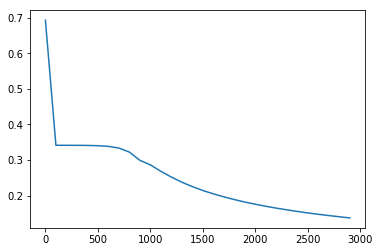

single process time: 85.289 s.


In [7]:
dims = [20, 1]
labels = [0,1,2,3,4,5,6,7,8,9]
label_train_Y = (train_y == 2).astype(int)
label_test_Y = (test_y == 2).astype(int)
pured_train_X = X_train_normalized[:, 0:5000]
pured_train_Y = label_train_Y[:, 0:5000]


t0 = time.time()
label_model = L_layer_model(pured_train_X, pured_train_Y, test_x, label_test_Y, dims, learning_rate=1.2, num_iterations = 3000, threads=1)
t1 = time.time()
print "single process time: {:.3f} s.".format(t1 - t0)

# pured_train_X = X_train_normalized[:, 0:1000]
# pured_train_Y = label_train_Y[:, 0:1000]
# t0 = time.time()
# label_model = L_layer_model(pured_train_X, pured_train_Y, test_x, label_test_Y, dims, learning_rate=1.2, num_iterations = 4000, threads=2)
# t1 = time.time()
# print "2 process time: {:.3f} s.".format(t1 - t0)


In [32]:
test_data[2500]['image'].show()

In [33]:
two = X_test_normalized[:,2500:2501]
predictions = predict(parameters=label_model,X=two)
print "prediction that the image is 2: " + str(bool(predictions[0][0]))

prediction that the image is 2: True


# Coursera Model

In [243]:
A = L_model_forward(parameters=label_model, X=pured_train_X)[0]
print pured_train_Y
print A[0][4]

[[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]]
0.000578531614627


In [162]:
import time
t0 = time.time()
mp_mc_model = mp_multiclass_model(X_train_normalized, train_y, X_test_normalized, test_y, labels, num_iterations = 500, 
                               learning_rate = 0.5, print_cost = True)
t1 = time.time()
print "multiple process time: {:.3f} s.".format(t1 - t0)

Training model for label:  0


Process Process-107:
Process Process-108:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    w = np.frombuffer(w)
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 90.1170540698 %
test accuracy: 90.2 %
Training model for label:  1


Process Process-109:
Process Process-110:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    self._target(*self._args, **self._kwargs)
    w = np.frombuffer(w)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
AttributeError: 'list' object has no attribute '__buffer__'
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 88.5986836624 %
test accuracy: 88.65 %
Training model for label:  2


Process Process-111:
Traceback (most recent call last):
Process Process-112:
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    w = np.frombuffer(w)
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 90.1212196951 %
test accuracy: 89.68 %
Training model for label:  3


Process Process-113:
Traceback (most recent call last):
Process Process-114:
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 89.896275931 %
test accuracy: 89.9 %
Training model for label:  4


Process Process-115:
Process Process-116:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    self._target(*self._args, **self._kwargs)
    w = np.frombuffer(w)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
AttributeError: 'list' object has no attribute '__buffer__'
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 90.2357743897 %
test accuracy: 90.18 %
Training model for label:  5


Process Process-117:
Process Process-118:
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    w = np.frombuffer(w)
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 90.8814463051 %
test accuracy: 91.08 %
Training model for label:  6


Process Process-119:
Traceback (most recent call last):
Process Process-120:
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    w = np.frombuffer(w)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
AttributeError: 'list' object has no attribute '__buffer__'
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 90.2607681413 %
test accuracy: 90.42 %
Training model for label:  7


Process Process-121:
Process Process-122:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    self._target(*self._args, **self._kwargs)
    w = np.frombuffer(w)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
AttributeError: 'list' object has no attribute '__buffer__'
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 89.6192618512 %
test accuracy: 89.72 %
Training model for label:  8


Process Process-123:
Traceback (most recent call last):
Process Process-124:
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    self._target(*self._args, **self._kwargs)
    w = np.frombuffer(w)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
AttributeError: 'list' object has no attribute '__buffer__'
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 90.2711822044 %
test accuracy: 90.26 %
Training model for label:  9


Process Process-125:
Traceback (most recent call last):
Process Process-126:
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
  File "<ipython-input-161-216766003a13>", line 63, in mp_optimize
    w = np.frombuffer(w)
    w = np.frombuffer(w)
AttributeError: 'list' object has no attribute '__buffer__'
AttributeError: 'list' object has no attribute '__buffer__'


train accuracy: 89.9983337499 %
test accuracy: 89.91 %
multiple process time: 3.229 s.


In [183]:
t0 = time.time()
mc_model = multiclass_model(X_train_normalized, train_y, X_test_normalized, test_y, labels, num_iterations = 2000, 
                            learning_rate = 0.05, print_cost = True)
t1 = time.time()
print "single process time: {:.3f} s.".format(t1 - t0)

Training model for label:  0
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.383120
Cost after iteration 200: 0.338575
Cost after iteration 300: 0.327722
Cost after iteration 400: 0.324372
Cost after iteration 500: 0.323208
Cost after iteration 600: 0.322777
Cost after iteration 700: 0.322612
Cost after iteration 800: 0.322546
Cost after iteration 900: 0.322520
Cost after iteration 1000: 0.322510
Cost after iteration 1100: 0.322505
Cost after iteration 1200: 0.322503
Cost after iteration 1300: 0.322503
Cost after iteration 1400: 0.322502
Cost after iteration 1500: 0.322502
Cost after iteration 1600: 0.322502
Cost after iteration 1700: 0.322502
Cost after iteration 1800: 0.322502
Cost after iteration 1900: 0.322501
train accuracy: 90.1170540698 %
test accuracy: 90.2 %
Training model for label:  1
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.407109
Cost after iteration 200: 0.367586
Cost after iteration 300: 0.358601
Cost after iteration 400: 0.356048
Cost af

KeyboardInterrupt: 

In [ ]:
params = initialize_parameters(layers_dims=[X_train_normalized.shape[0], 1])

W = params[0]['W']
b = params[0]['b']

a = np.random.randn(400,400)
b = np.random.randn(400,400)
c = np.random.randn(400,400)
d = np.random.randn(4,4)

p = mp.Pool()

results = p.map(lin_fwd,[(a,b,c)])
p.close()
p.join()
print(results)

Process PoolWorker-7:
Process PoolWorker-6:
Process PoolWorker-9:
Process PoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/UnicornKing/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    s